In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from pre processing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Data Briefing**


In [ ]:
print(df.head())
df.tail()


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

###Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No null values in this dataset.

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

###Duplicated Values

In [ ]:
df.duplicated().sum()

0

###Inconsistent Data

###Target column


In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The data is perfectly balanced.

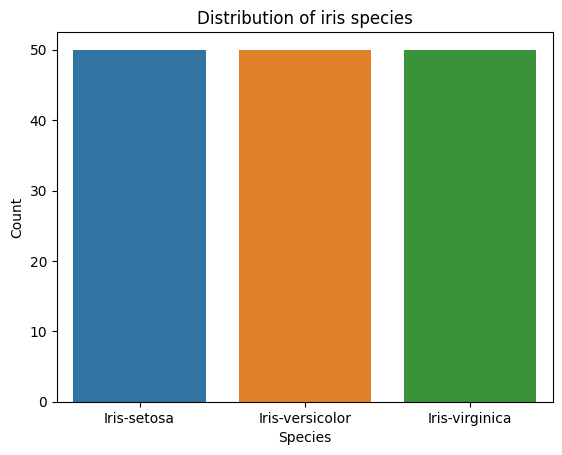

In [ ]:
sns.countplot(data=df, x="Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of iris species")
plt.show()

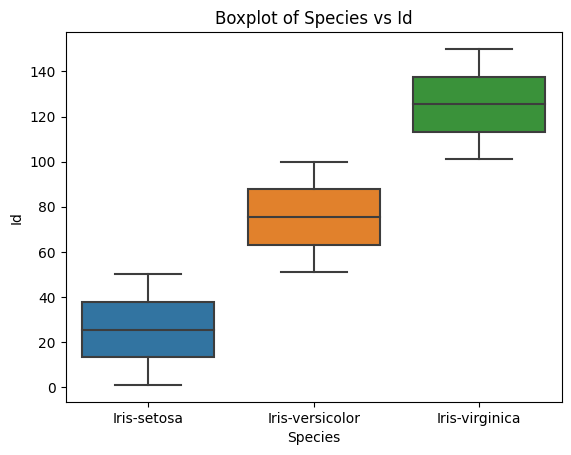

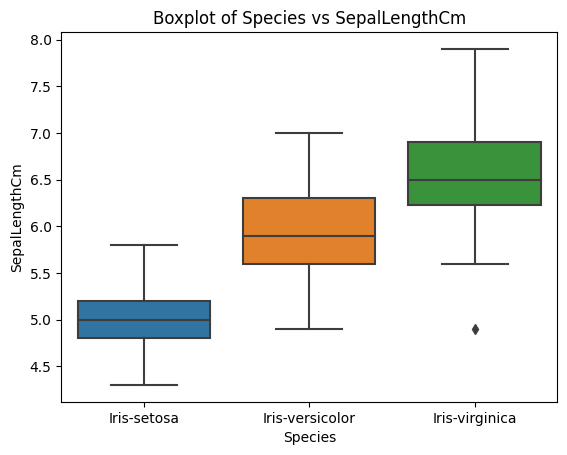

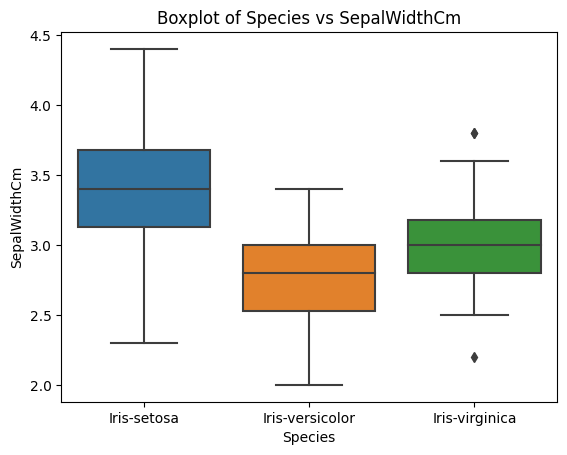

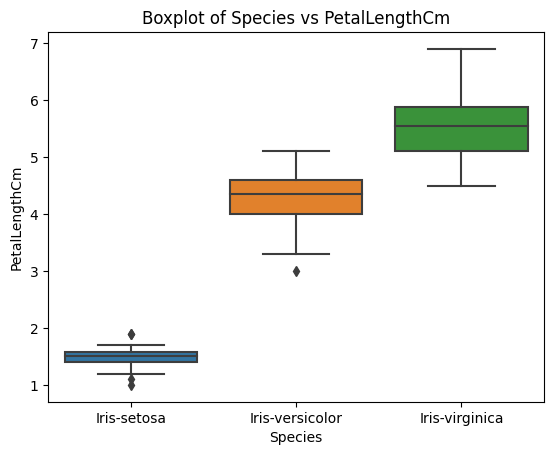

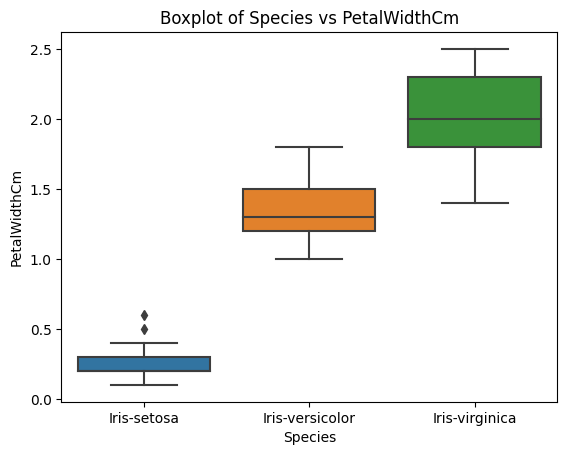

In [ ]:
for i in df.columns:
  if i!='Species':
    sns.boxplot(x='Species', y=i, data=df)
    plt.xlabel("Species")
    plt.ylabel(f"{i}")
    plt.title(f"Boxplot of Species vs {i}")
    plt.show()

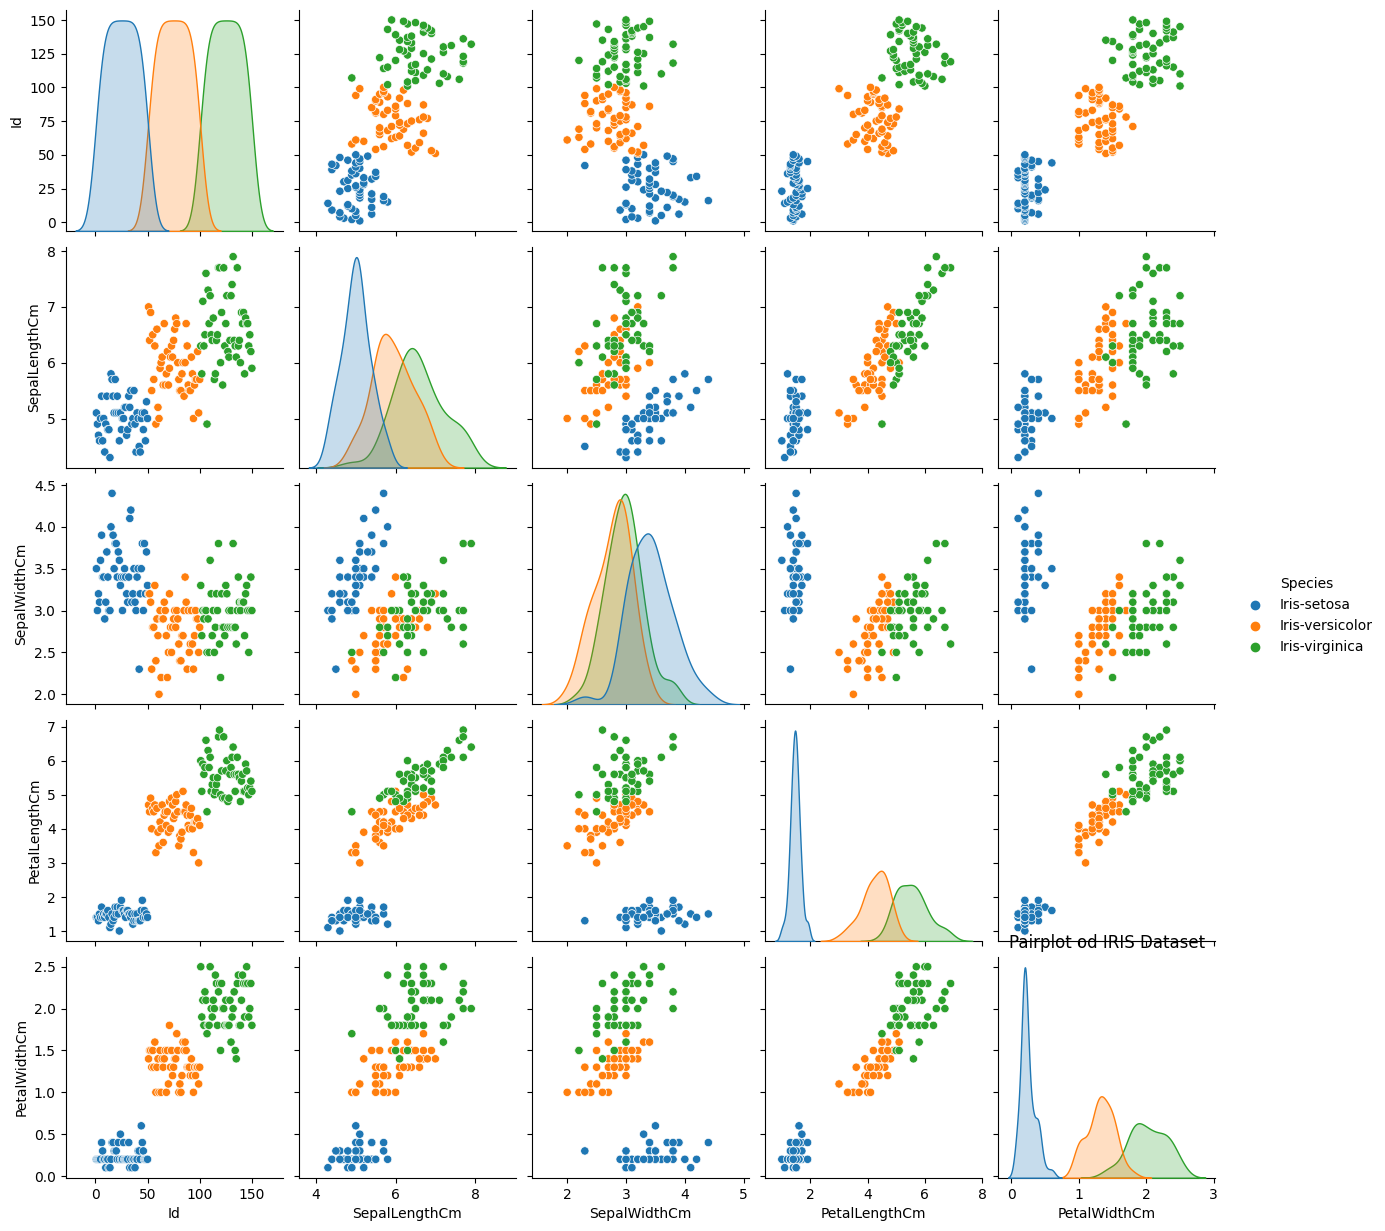

In [ ]:
sns.pairplot(data=df,hue="Species")
plt.title("Pairplot od IRIS Dataset")
plt.show()

In [13]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species']


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [16]:
X=df.drop(columns=['Species','Id'])
Y=df['Species']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [18]:
 model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
accuracy

92.10526315789474

Using OVR strategy.In this approach, you train a binary classifier for each class against all the other classes.

Classify "iris-setosa" vs. (Other Classes): You create the first binary classifier that distinguishes "iris-setosa" from the combination of the other two classes, "iris-versicolor" and "iris-virginica."

Classify "iris-versicolor" vs. (Other Classes): You create the second binary classifier that distinguishes "iris-versicolor" from the combination of "iris-setosa" and "iris-virginica."

Classify "iris-virginica" vs. (Other Classes): Finally, you create the third binary classifier that distinguishes "iris-virginica" from the combination of "iris-setosa" and "iris-versicolor.

